In [1]:
import glob
import pickle
import numpy as np
import cv2

class CameraCalibration:
    def __init__(self, nCols = 9, nRows = 6, calibrationFiles = None):
        """Creates a camera calibration object

        nCols - Number of columns
        nRows - Number of rows
        calibrationFiles - Files calibration based on. If None camera parameters will be loaded from a pickle binary.
        """
        self._nRows = nRows
        self._nCols = nCols
        if calibrationFiles != None:
            self._cameraMatrix, self._distCoeffs = self._calibrate(calibrationFiles)
        else:
            cameraParams = pickle.load(open('camera_parameters.p', 'rb'))
            self._cameraMatrix = cameraParams['cameraMatrix']
            self._distCoeffs = cameraParams['distCoeffs']

    def _calibrate(self, path):
        """Calibrates the camera

        path - Files of image calibration based on.
        
        Returns camera matrix and distortion coefficients
        """
        coordinates = np.zeros((self._nRows * self._nCols, 3), np.float32)
        coordinates[:, :2] = np.mgrid[0 : self._nCols, 0 : self._nRows].T.reshape(self._nCols * self._nRows, 2)
        objectPoints = []
        imagePoints = []
        calibrationFiles = glob.glob(path)
        for idx, filename in enumerate(calibrationFiles):
            colorImage = cv2.imread(filename) # in BGR
            grayscaleImage = cv2.cvtColor(colorImage, cv2.COLOR_BGR2GRAY)
            retVal, corners = cv2.findChessboardCorners(grayscaleImage, (self._nCols, self._nRows))
            if retVal: # it is not sure all chessboard corners are found
                objectPoints.append(coordinates)
                imagePoints.append(corners)
        retVal, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, (1280, 720), None, None)
        return cameraMatrix, distCoeffs

    def undistort(self, image):
        """Undistort an image

        image - Image what will be undistorted
        
        Returns the undistorted image
        """
        return cv2.undistort(image, self._cameraMatrix, self._distCoeffs)

In [2]:
camera = CameraCalibration(9,6,'camera_cal/calibration*.jpg')

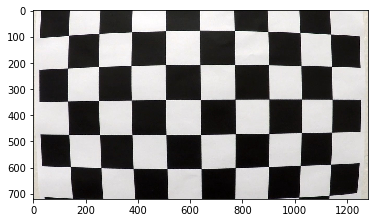

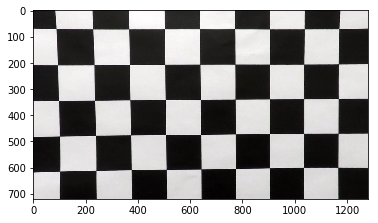

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
image1 = plt.imread('camera_cal/calibration1.jpg')
image2 = camera.undistort(image1)
plt.imshow(image1)
plt.figure()
plt.imshow(image2)